<a href="https://colab.research.google.com/github/ameermuhammed7777/ameer/blob/main/project_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSIC GENRE CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/archive(41).zip')
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [ ]:
df.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [ ]:
df.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [ ]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
df.corr()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,1.000000,-0.607910,-0.048918,-0.114307,-0.047156,-0.260179,-0.027125,0.063304,0.057346,-0.050991,0.087442
Year,-0.607910,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),-0.048918,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,-0.114307,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,-0.047156,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),-0.260179,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,-0.027125,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,0.063304,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,0.057346,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,-0.050991,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689


<AxesSubplot:>

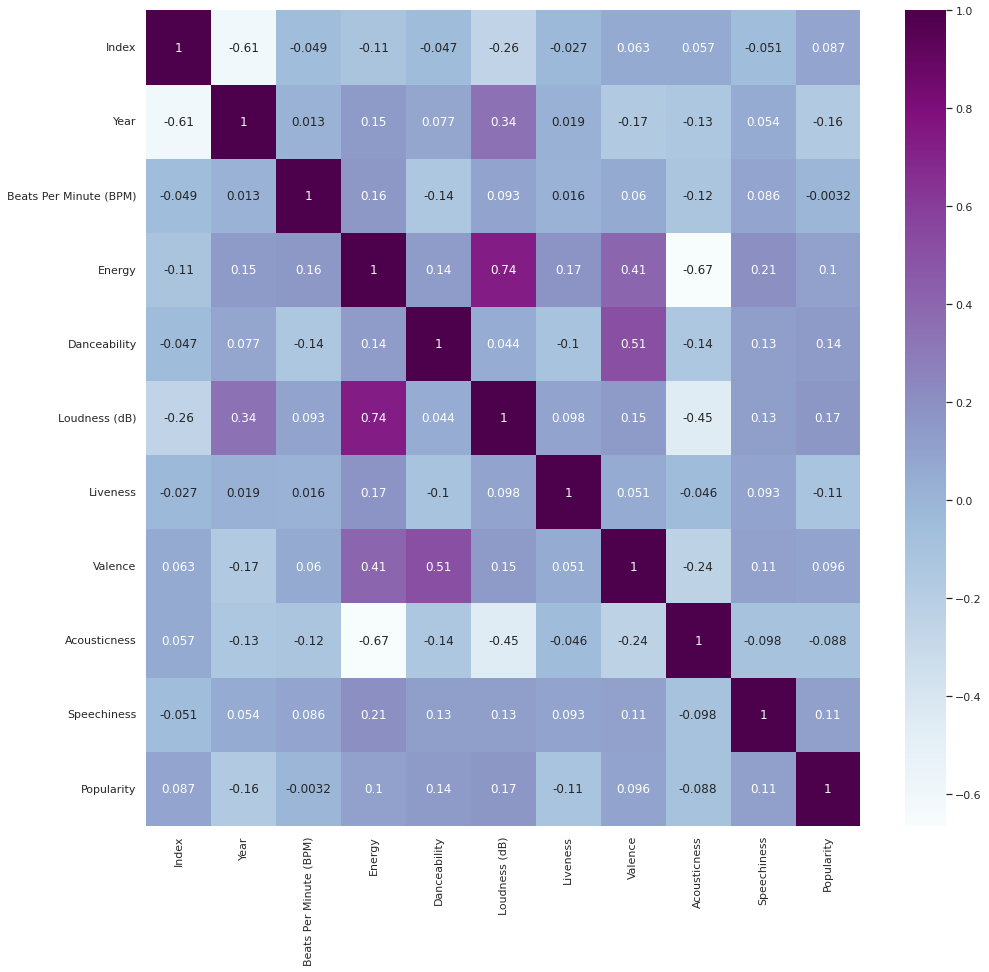

In [ ]:
plt.figure(figsize=(16,15))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

In [ ]:
a=df['Year'].mode() [0]
a

2008

In [ ]:
b=df['Popularity'].mean()
b

59.52657973921765

In [ ]:
df1=pd.get_dummies(df[['Title','Artist','Top Genre']],drop_first=True)
df1

,Title_(Everything I Do) I Do It For You,Title_(I Can't Get No) Satisfaction - Mono Version,"Title_(I've Had) The Time of My Life - From ""Dirty Dancing"" Soundtrack",Title_(Sittin' On) the Dock of the Bay,Title_(Something Inside) So Strong,Title_(They Long To Be) Close To You,Title_(What A) Wonderful World,Title_(You Make Me Feel Like) A Natural Woman,Title_(You're The) Devil in Disguise,Title_1979 - Remastered 2012,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3=pd.concat([df,df1],axis=1)
df3

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,...,0,0,0,0,0,0,0,0,0,0
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,...,0,0,0,0,0,0,0,0,0,0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,...,0,0,0,0,0,0,0,0,0,0
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,...,0,0,0,0,0,0,0,0,0,0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,...,0,0,0,0,0,0,0,0,0,0
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,...,0,0,0,0,0,0,0,0,0,0
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,...,0,0,0,0,0,0,0,0,0,0
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.drop(['Index','Title','Artist','Top Genre','Length (Duration)'],axis=1,inplace=True)
df3

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,2004,157,30,53,-14,11,68,94,3,71,...,0,0,0,0,0,0,0,0,0,0
1,2000,135,79,50,-11,17,81,17,7,39,...,0,0,0,0,0,0,0,0,0,0
2,2001,168,69,66,-9,7,52,2,17,69,...,0,0,0,0,0,0,0,0,0,0
3,2007,173,96,43,-4,3,37,0,4,76,...,0,0,0,0,0,0,0,0,0,0
4,2002,106,82,58,-5,10,87,1,3,59,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63,...,0,0,0,0,0,0,0,0,0,0
1990,1958,175,76,36,-8,76,95,73,6,69,...,0,0,0,0,0,0,0,0,0,0
1991,1959,168,80,53,-9,31,97,74,7,74,...,0,0,0,0,0,0,0,0,0,0
1992,1959,174,26,45,-13,7,60,54,4,65,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.columns

Index(['Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability',
       'Loudness (dB)', 'Liveness', 'Valence', 'Acousticness', 'Speechiness',
       'Popularity',
       ...
       'Top Genre_reggae', 'Top Genre_reggae fusion',
       'Top Genre_rock-and-roll', 'Top Genre_scottish singer-songwriter',
       'Top Genre_soft rock', 'Top Genre_stomp and holler',
       'Top Genre_streektaal', 'Top Genre_trance', 'Top Genre_uk pop',
       'Top Genre_yacht rock'],
      dtype='object', length=2845)

In [ ]:
df3.dtypes

Year                          int64
Beats Per Minute (BPM)        int64
Energy                        int64
Danceability                  int64
Loudness (dB)                 int64
                              ...  
Top Genre_stomp and holler    uint8
Top Genre_streektaal          uint8
Top Genre_trance              uint8
Top Genre_uk pop              uint8
Top Genre_yacht rock          uint8
Length: 2845, dtype: object

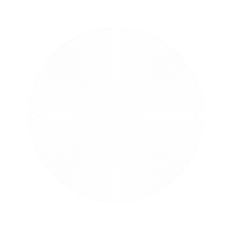

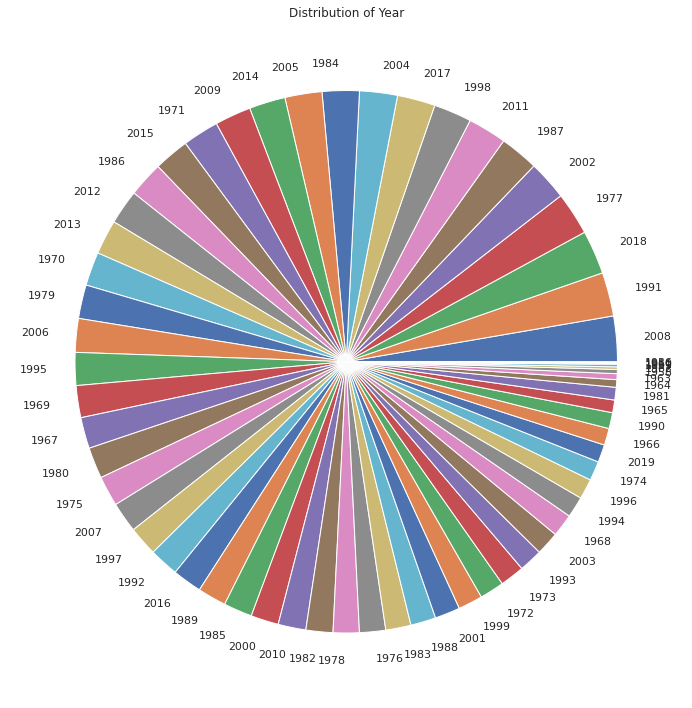

In [ ]:
X=df['Year']
plt.pie(X)
counts = X.value_counts()
fig = plt.figure(figsize=(25,10))
plt.pie(counts, labels=counts.index)
plt.title('Distribution of Year')
plt.tight_layout()
plt.show()


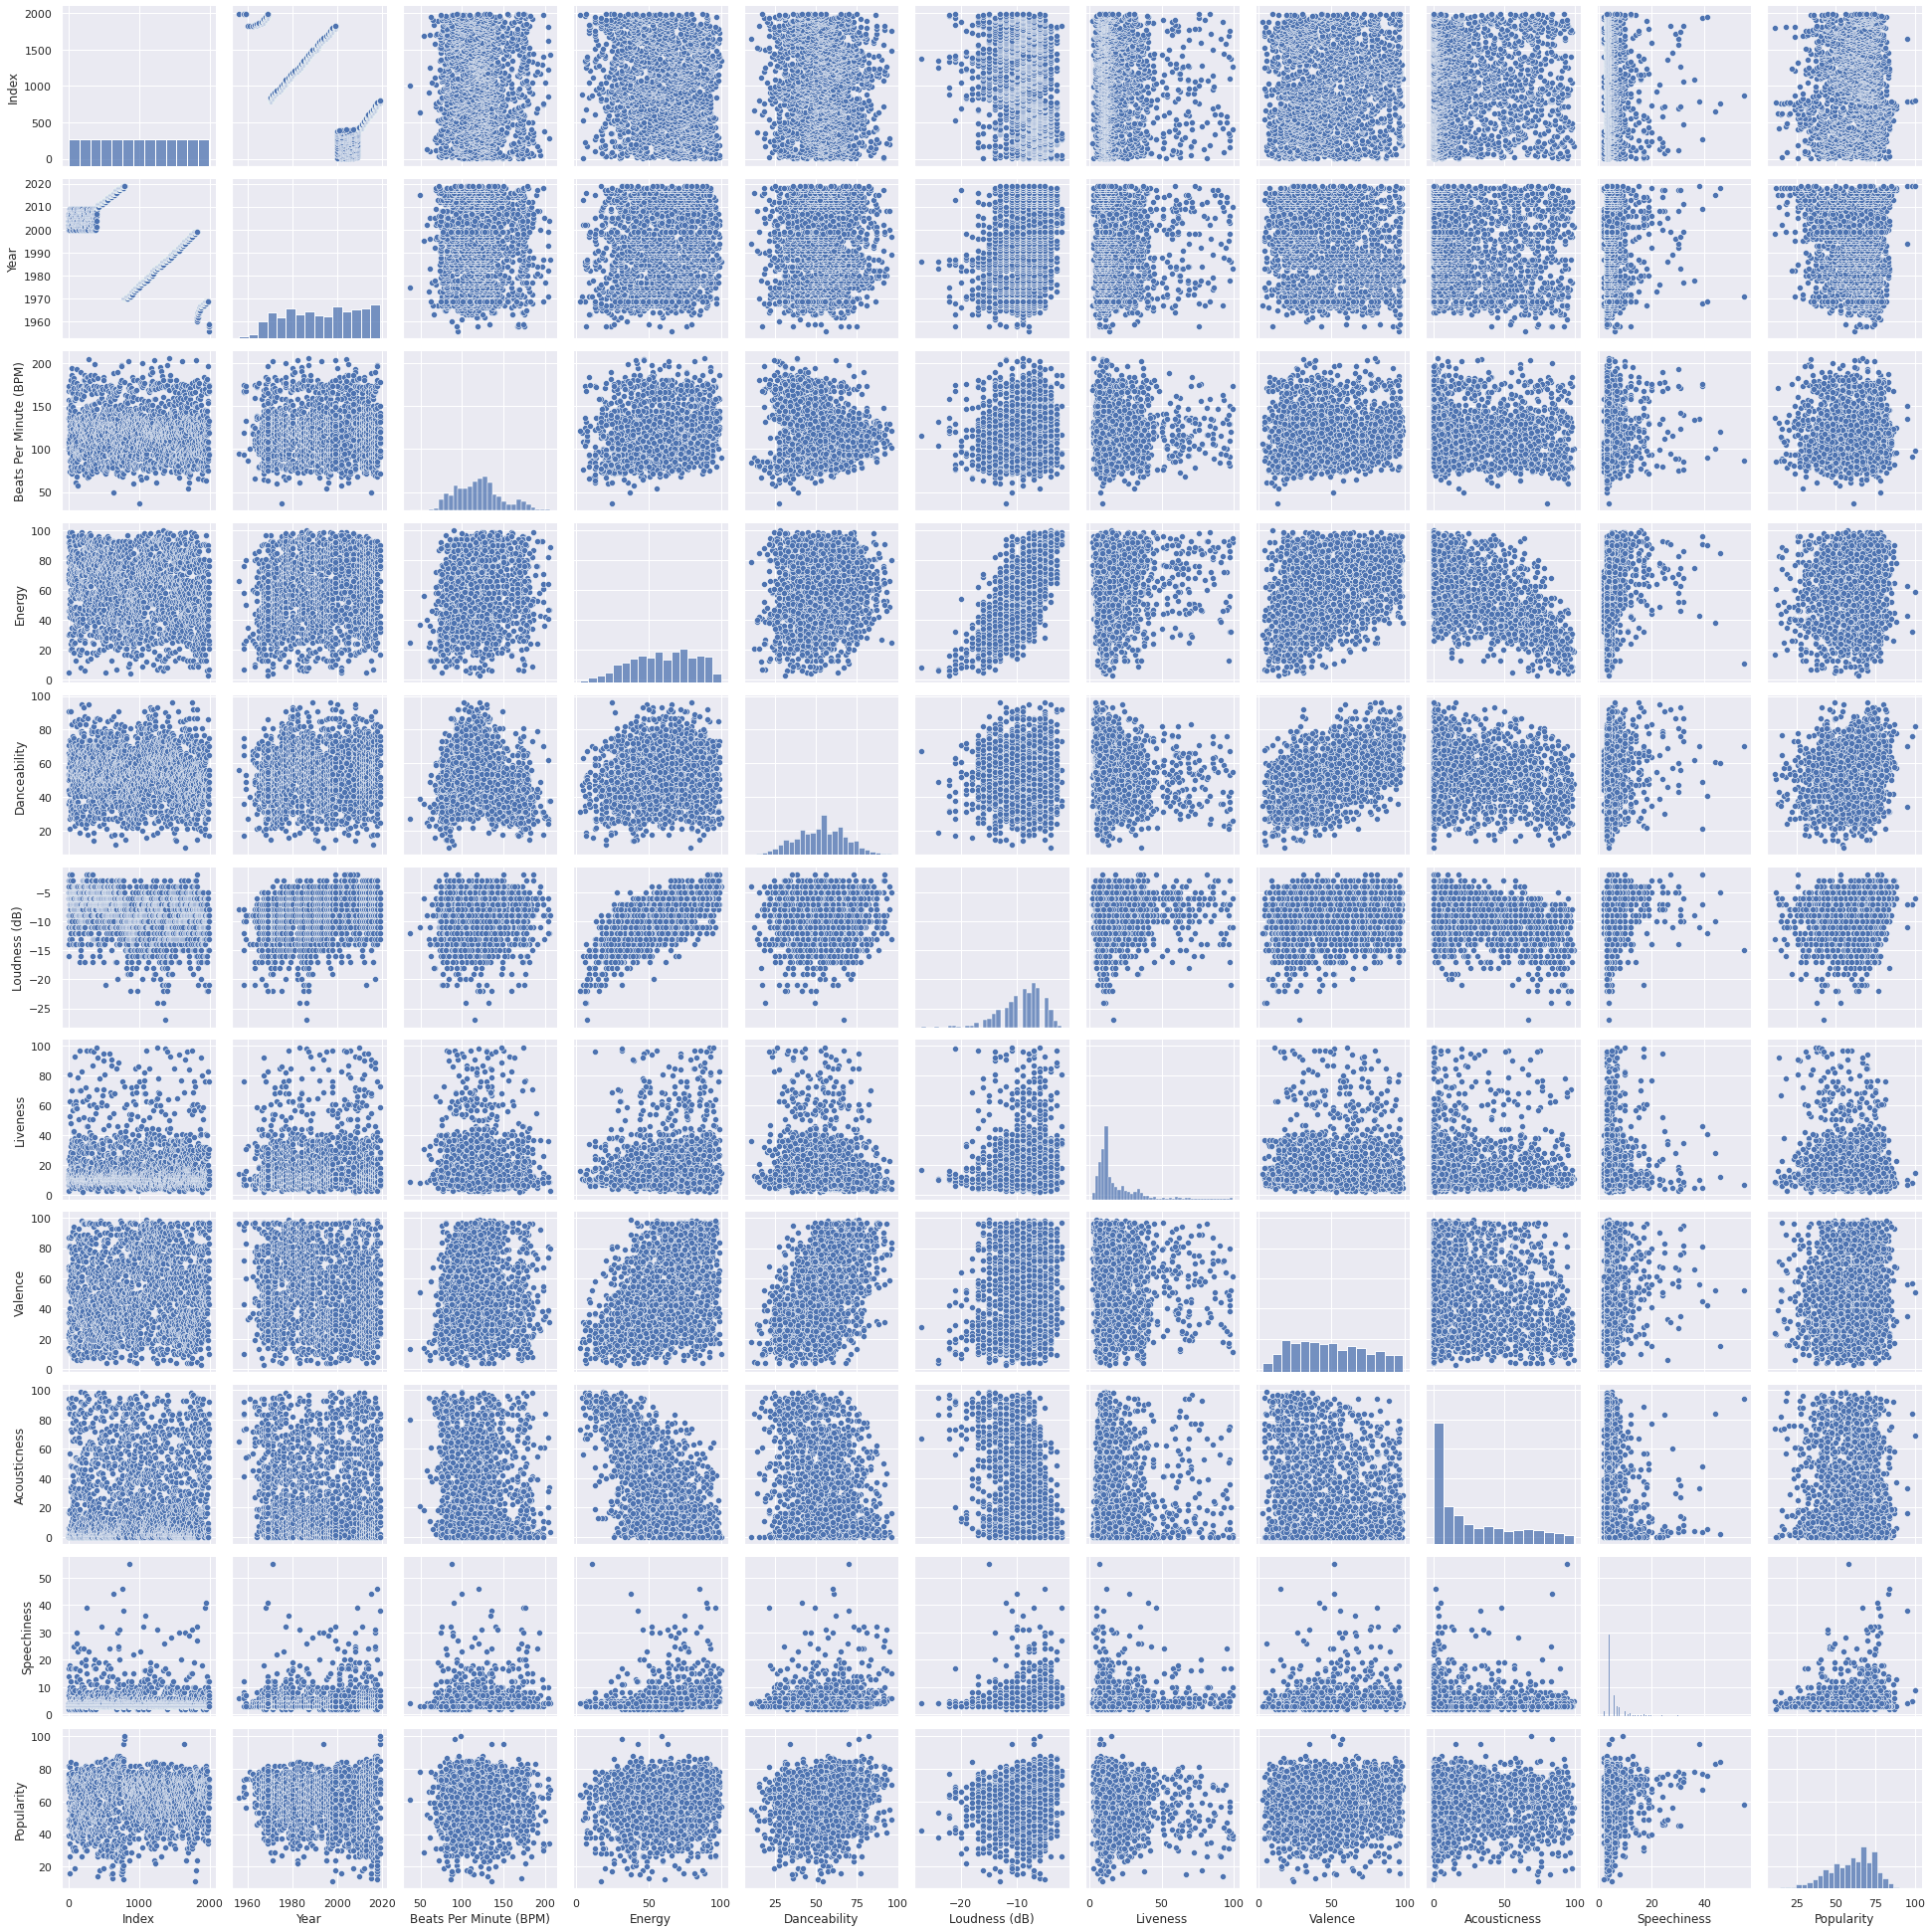

In [ ]:
sns.pairplot(df)

In [ ]:
data = df[["Beats Per Minute (BPM)","Energy","Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(df)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(df3)
  wcss.append(model.inertia_)
wcss

[7479324.409227788,
 5579961.630823689,
 4819207.858028792,
 4293470.459029414,
 3983118.93234583,
 3731251.800467601,
 3509582.1456057485,
 3323893.553938388,
 3201175.4722089837,
 3102415.5374200307]

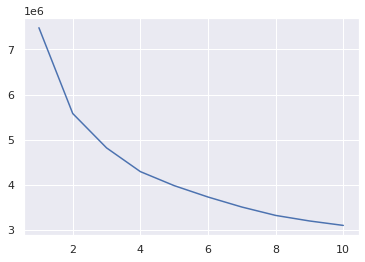

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_model=model.fit_predict(data)
y_model

array([0, 4, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
df3['cluster']=y_model
df3

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,...,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock,cluster
0,2004,157,30,53,-14,11,68,94,3,71,...,0,0,0,0,0,0,0,0,0,0
1,2000,135,79,50,-11,17,81,17,7,39,...,0,0,0,0,0,0,0,0,0,4
2,2001,168,69,66,-9,7,52,2,17,69,...,0,0,0,0,0,0,0,0,0,3
3,2007,173,96,43,-4,3,37,0,4,76,...,0,0,0,0,0,0,0,0,0,3
4,2002,106,82,58,-5,10,87,1,3,59,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,-12,11,72,84,7,63,...,0,0,0,0,0,0,0,0,0,2
1990,1958,175,76,36,-8,76,95,73,6,69,...,0,0,0,0,0,0,0,0,0,0
1991,1959,168,80,53,-9,31,97,74,7,74,...,0,0,0,0,0,0,0,0,0,0
1992,1959,174,26,45,-13,7,60,54,4,65,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]
print(x)
print(y)

      Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0     2004                     157      30            53            -14   
1     2000                     135      79            50            -11   
2     2001                     168      69            66             -9   
3     2007                     173      96            43             -4   
4     2002                     106      82            58             -5   
...    ...                     ...     ...           ...            ...   
1989  1958                      94      21            70            -12   
1990  1958                     175      76            36             -8   
1991  1959                     168      80            53             -9   
1992  1959                     174      26            45            -13   
1993  1959                     133      50            49            -10   

      Liveness  Valence  Acousticness  Speechiness  Popularity  ...  \
0           11       68     

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
361,2005,139,71,82,-7,61,77,1,18,80,...,0,0,0,0,0,0,0,0,0,0
589,2014,92,88,66,-3,69,77,3,9,41,...,0,0,0,0,0,0,0,0,0,0
816,1970,148,21,33,-18,18,28,84,3,62,...,0,0,0,0,0,0,0,0,0,0
115,2007,75,67,30,-5,15,68,3,5,59,...,0,0,0,0,0,0,0,0,0,0
535,2013,78,40,57,-11,8,30,74,3,49,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1998,116,19,56,-13,11,12,73,3,53,...,0,0,0,0,0,0,0,0,0,0
1096,1978,77,57,54,-8,9,73,1,16,66,...,0,0,0,0,0,0,0,0,0,0
1932,1968,167,52,18,-8,6,42,39,3,48,...,0,0,0,0,0,0,0,0,0,0
235,2009,180,66,51,-7,12,46,3,4,79,...,0,0,0,0,0,0,0,0,0,0


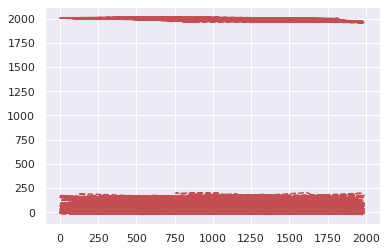

In [ ]:
plt.plot(x_test,linestyle='dashed',color='r')
plt.show()

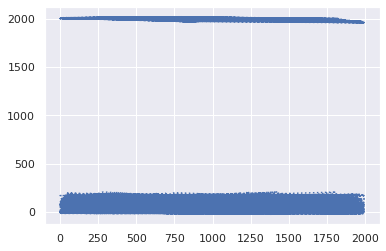

In [ ]:
plt.plot(x_train,linestyle='dotted',color='b')
plt.show()

In [ ]:
df3['cluster'].value_counts()

4    593
1    474
3    336
2    296
0    295
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

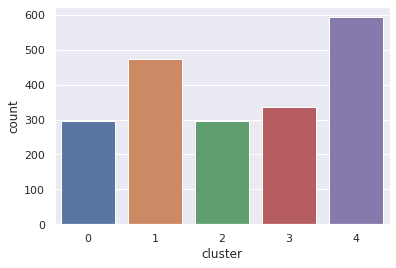

In [ ]:
sns.countplot(x='cluster',data=df3)

In [ ]:
#importing SMOTE 
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

cluster
0          593
1          593
2          593
3          593
4          593
dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

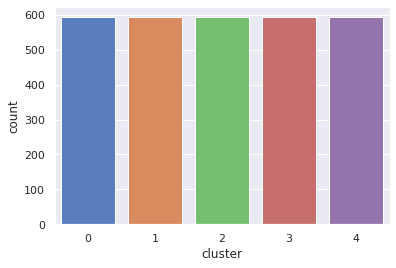

In [ ]:
sns.countplot(x = yo, palette='muted')

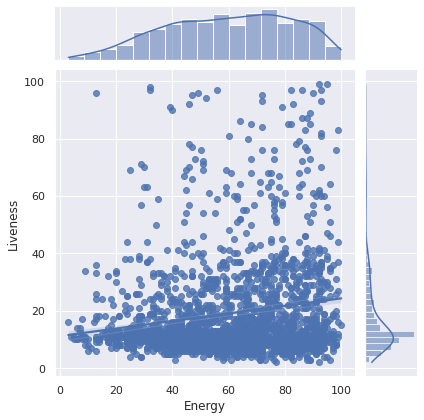

In [ ]:
sns.jointplot(x='Energy',y='Liveness',data=df3,kind='reg')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=KNeighborsClassifier(n_neighbors=5)
model1 = SVC()
model2 = GaussianNB()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
ls_model=[model,model1,model2,model3,model4]

KNeighborsClassifier()
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.88      0.92      0.89       107
           2       0.94      0.87      0.91        55
           3       0.96      0.81      0.88        64
           4       0.88      0.93      0.90       123

    accuracy                           0.89       399
   macro avg       0.90      0.89      0.89       399
weighted avg       0.90      0.89      0.89       399

***************************************************
SVC()
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00        64
           4       0.31      1.00      0.48       123

  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**************************************************
              precision    recall  f1-score   support

           0       0.18      0.36      0.24        50
           1       0.45      0.13      0.20       107
           2       0.20      0.65      0.30        55
           3       0.28      0.30      0.29        64
           4       0.56      0.08      0.14       123

    accuracy                           0.24       399
   macro avg       0.33      0.30      0.24       399
weighted avg       0.39      0.24      0.22       399

***************************************************
DecisionTreeClassifier()
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        50
           1       0.91      0.94      0.93       107
           2       1.00      0.95      0.97        55
           3       0.96      0.84      0.90        64
           4       0.94      0.97      0.95       123

    ac

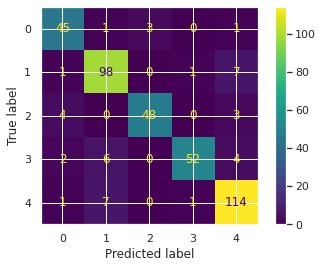

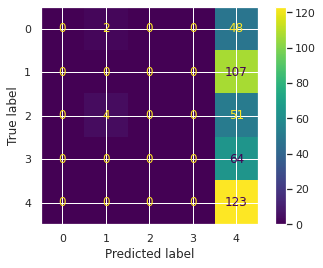

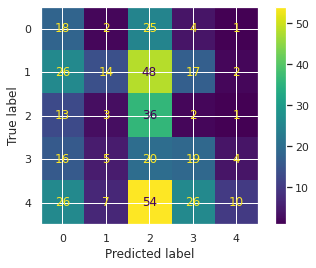

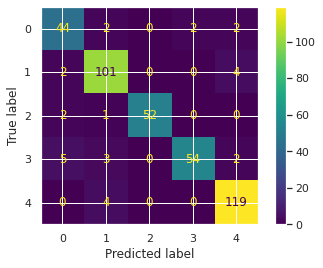

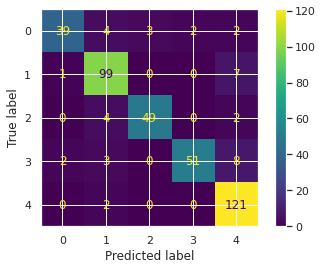

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

for i in ls_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_df = accuracy_df.append({'Model': str(i), 'Accuracy': accuracy}, ignore_index=True)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('**************************************************')
  print(classification_report(y_test,y_pred))
  print('***************************************************')

In [ ]:
accuracy_df['Accuracy']=accuracy_df['Accuracy']*100
print(accuracy_df)

                      Model   Accuracy
0    KNeighborsClassifier()  89.473684
1                     SVC()  30.827068
2              GaussianNB()  24.310777
3  DecisionTreeClassifier()  92.731830
4  RandomForestClassifier()  89.974937


In [ ]:
#sorting models based on their accuracy score
accuracy_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,DecisionTreeClassifier(),92.731830
4,RandomForestClassifier(),89.974937
0,KNeighborsClassifier(),89.473684
1,SVC(),30.827068
2,GaussianNB(),24.310777


Decision Tree Classifier is the best model


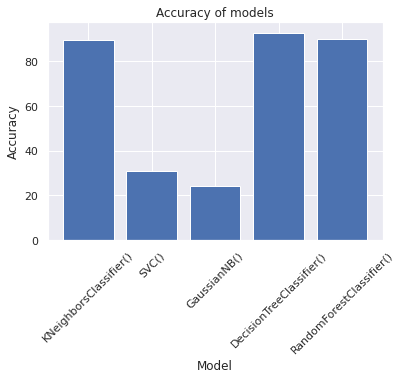

In [ ]:
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.xticks(rotation=45)
plt.show()